<a href="https://colab.research.google.com/github/joel-codeing/code-clause/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [63]:
# Load the dataset
df = pd.read_csv('/content/telecom_churn.csv')

# Sample random rows from the dataset
df = df.sample(n=300, random_state=42)

# Drop irrelevant columns
df = df.drop(['customer_id', 'state', 'city', 'pincode', 'Unnamed: 13', 'Unnamed: 14'], axis=1)

# Drop any rows with missing values
df = df.dropna()

# Convert categorical variables to one-hot encoded format
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the sampled dataset
print(df.head())

        age  num_dependents  estimated_salary  calls_made  sms_sent  \
230796   20               2            104752          38        47   
191985   68               2             71706          43        33   
18778    30               4            137473          -2        12   
241016   22               0             58245          32        11   
136494   63               4             73740          68        11   

        data_used  churn  telecom_partner_BSNL  telecom_partner_Reliance Jio  \
230796       1687      0                 False                         False   
191985        991      0                 False                         False   
18778        6803      0                 False                         False   
241016       2832      0                 False                         False   
136494       5375      0                 False                          True   

        telecom_partner_Vodafone  gender_M  
230796                     False      True  
19

              age  num_dependents  estimated_salary  calls_made    sms_sent  \
count  300.000000       300.00000        300.000000  300.000000  300.000000   
mean    45.160000         2.05000      80360.246667   48.103333   23.436667   
std     16.443917         1.40502      37228.626118   29.947993   14.578331   
min     18.000000         0.00000      20407.000000   -8.000000   -4.000000   
25%     30.000000         1.00000      47153.250000   24.000000   10.000000   
50%     45.000000         2.00000      78090.500000   47.500000   24.000000   
75%     59.000000         3.00000     112129.500000   72.250000   35.000000   
max     74.000000         4.00000     148959.000000  106.000000   52.000000   

          data_used       churn  
count    300.000000  300.000000  
mean    4851.246667    0.186667  
std     2987.408037    0.390295  
min     -820.000000    0.000000  
25%     2272.750000    0.000000  
50%     4766.500000    0.000000  
75%     7226.500000    0.000000  
max    10936.000

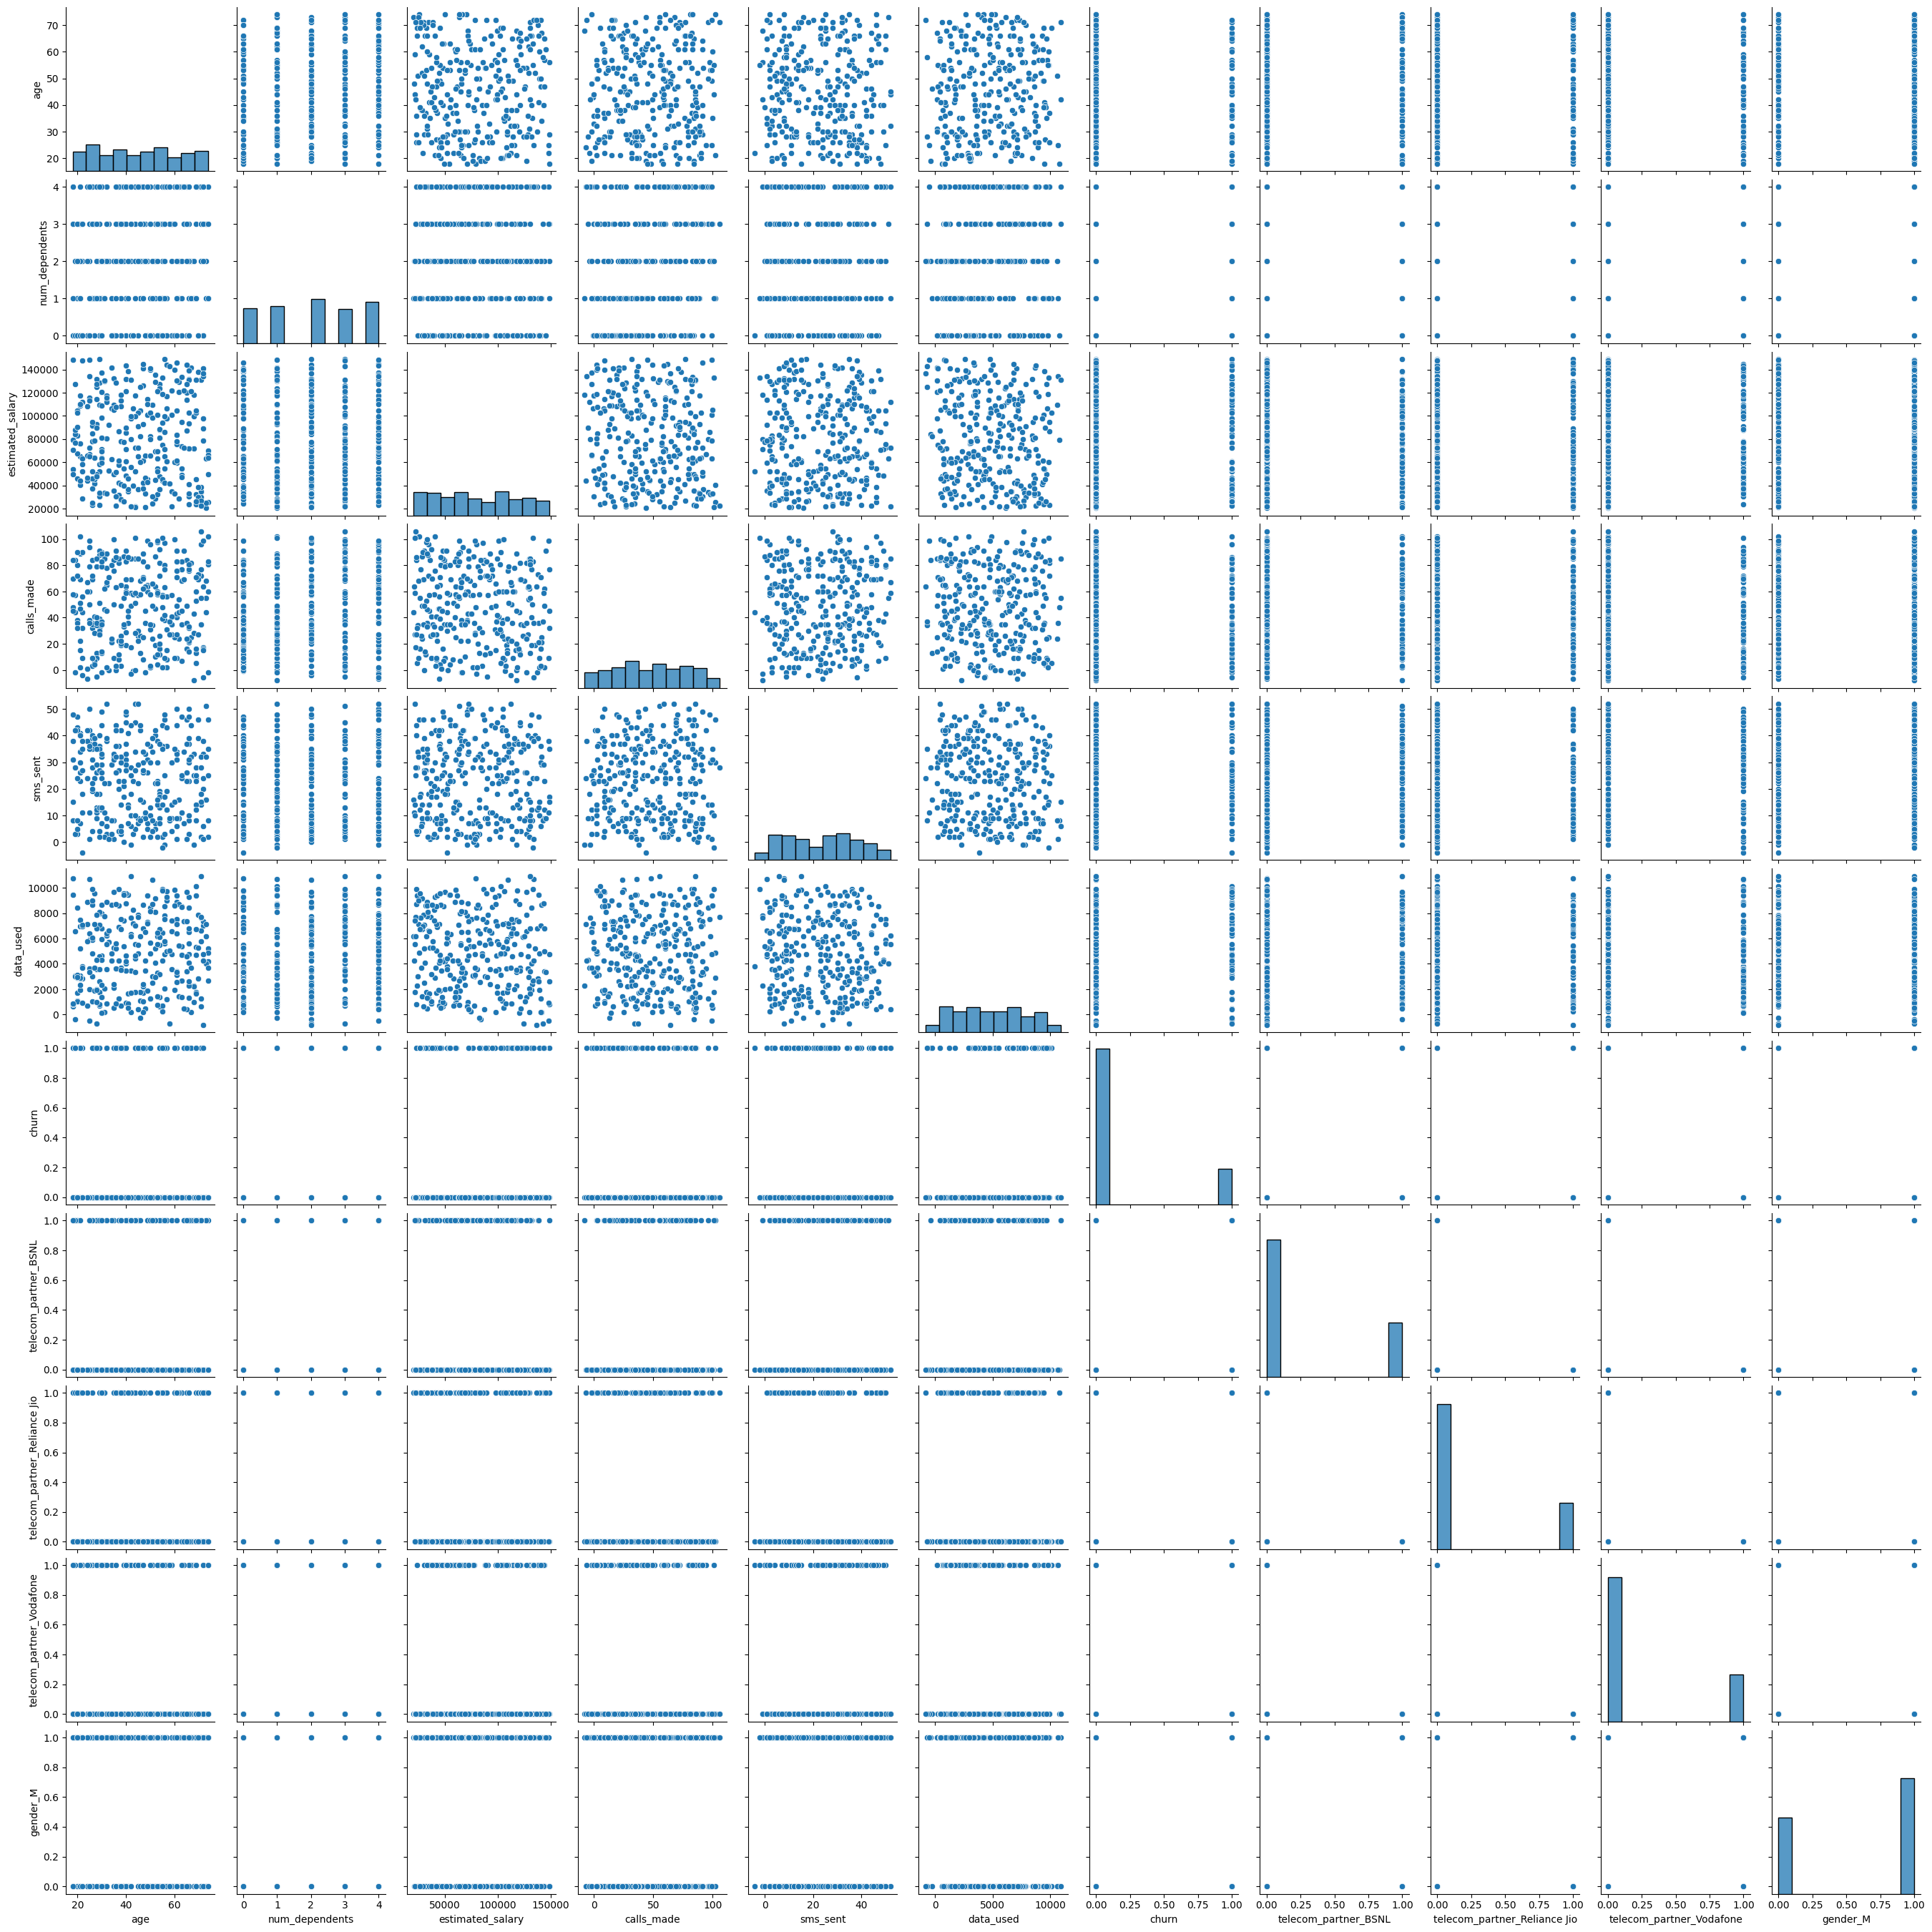

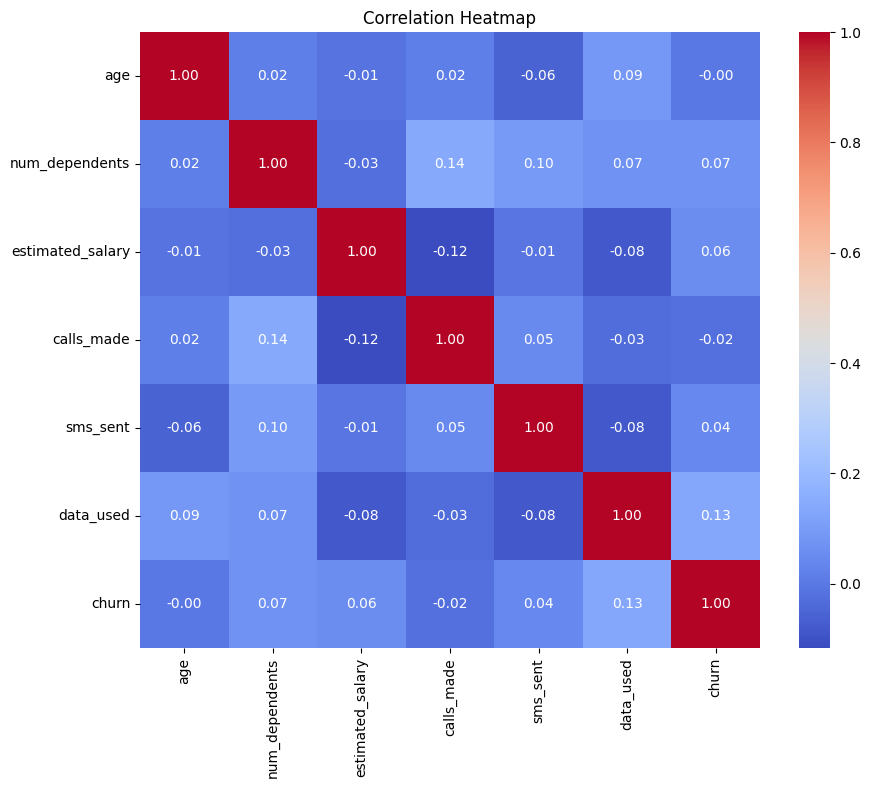

In [64]:
# Summary statistics
print(df.describe())
print()

# Checking for missing values
print(df.isnull().sum())
print()

# Distribution of numerical features
sns.pairplot(df)
plt.show()
print()

# Create the heatmap
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# Split features and target variable
X = df.drop(['churn'], axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean absolute error, mean squared error, and r-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.28950000000000004
Mean Squared Error: 0.1537683333333333
Root Mean Squared Error: 0.3921330556499073
R-squared: 0.03894791666666697


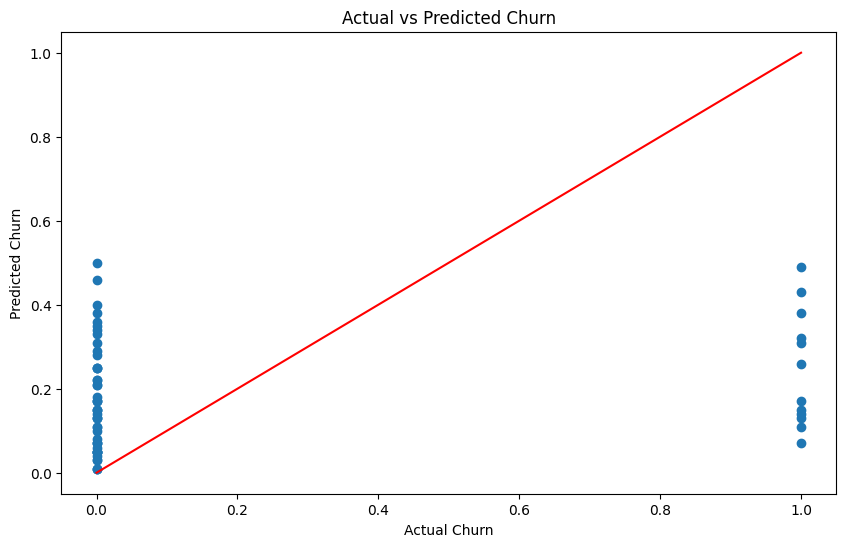

In [68]:
# Visualize the actual vs predicted churn
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.title('Actual vs Predicted Churn')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect prediction
plt.show()